In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
IMAGE_SIZE = [224, 224]

train_path = r'C:\\Users\\Adarsh\\Desktop\\Hair Diseas Hair Diseases - Final\\train'
test_path = r'C:\\Users\\Adarsh\\Desktop\\Hair Diseas\\Hair Diseases - Final\\test'
val_path = r'C:\\Users\\Adarsh\\Desktop\\Hair Diseas\\Hair Diseases - Final\\val'


In [3]:
rn = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

2022-05-21 04:14:52.497354: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-21 04:14:52.631711: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-21 04:14:52.632517: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-21 04:14:52.633686: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

80150528/80134624 [==============================] - 2s 0us/step


In [4]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

get_available_gpus()

from tensorflow.python.client import device_lib

2022-05-21 04:14:59.253779: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-21 04:14:59.254558: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-21 04:14:59.254999: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-21 04:14:59.255421: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-21 04:14:59.255747: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [5]:
for layer in rn.layers:
    layer.trainable = False
    
folders = glob(train_path+'\*')

In [6]:
x = Flatten()(rn.output)

In [7]:
prediction = Dense(10, activation='softmax')(x)
model = Model(inputs=rn.input, outputs=prediction)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(directory=train_path,
                target_size = (224,224),
                batch_size = 64,
                class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(directory=test_path,
                target_size = (224,224),
                batch_size = 64,
                class_mode = 'categorical', shuffle=False)
val_set = val_datagen.flow_from_directory(directory=val_path,
                target_size = (224,224),
                batch_size = 64,
                class_mode = 'categorical', shuffle=False)

Found 9600 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.


In [10]:
import keras
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=["acc"]
)

In [12]:
import keras
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

annealer = ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-4)
checkpoint = ModelCheckpoint('/temp/{epoch}_VGG19.h5', verbose=1, save_best_only=False, mode='auto', save_freq='epoch')

def inverse_distance_weighted_kernel(X, Y, p=1):
    dist = np.sum(X**2, axis=1).reshape(-1, 1) + np.sum(Y**2, axis=1) - 2*np.dot(X, Y.T)
    kernel = 1 / (1 + np.power(dist, p))
    return kernel

svm = SVC(kernel=inverse_distance_weighted_kernel)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)




In [13]:
history = model.fit(
                  training_set,
                  validation_data=val_set,
                  epochs=20,
                  batch_size=128,
                  callbacks=[annealer, checkpoint],
                  steps_per_epoch=len(training_set),
                  validation_steps=len(test_set)
                )

2022-05-21 04:15:04.380836: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-05-21 04:15:06.536461: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


150/150 [==============================] - 116s 692ms/step - loss: 1.0295 - acc: 0.7017 - val_loss: 0.5544 - val_acc: 0.8083

Epoch 00001: saving model to /temp/1_VGG19.h5
Epoch 2/20
150/150 [==============================] - 79s 529ms/step - loss: 0.2711 - acc: 0.9458 - val_loss: 0.2580 - val_acc: 0.9475

Epoch 00002: saving model to /temp/2_VGG19.h5
Epoch 3/20
150/150 [==============================] - 79s 526ms/step - loss: 0.1352 - acc: 0.9827 - val_loss: 0.1742 - val_acc: 0.9692

Epoch 00003: saving model to /temp/3_VGG19.h5
Epoch 4/20
150/150 [==============================] - 79s 528ms/step - loss: 0.0885 - acc: 0.9901 - val_loss: 0.1329 - val_acc: 0.9742

Epoch 00004: saving model to /temp/4_VGG19.h5
Epoch 5/20
150/150 [==============================] - 78s 520ms/step - loss: 0.0595 - acc: 0.9954 - val_loss: 0.1313 - val_acc: 0.9650

Epoch 00005: saving model to /temp/5_VGG19.h5
Epoch 6/20
150/150 [==============================] - 79s 523ms/step - loss: 0.0452 - acc: 0.9968 - 

In [14]:
#time.ctime()
train_time = time() - t_start
print('\nTrain time: %.3f'%(train_time/60), ' mins')


Train time: 27.192  mins


In [15]:
model.save("VGG19-Final.h5")
print("Model Saved as : VGG19-Final.h5")

import json
np.save('my_history.npy',history.history)
import pandas as pd

# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = 'history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv: 
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

Model Saved as : VGG19-Final.h5


In [16]:
from time import time
start = time()
evl = model.evaluate(test_set)
test_time = time() - start

test_loss, test_acc = evl[0]*100, evl[1]*100

msg = f'Test Accuracy = {test_acc:5.2f} %'
msg1 = f'Test Loss = {test_loss:5.2f} %'
msg2 = f'Test Time = {test_time:5.2f} s'
print(msg)
print(msg1)
print(msg2)

19/19 [==============================] - 11s 570ms/step - loss: 0.0534 - acc: 0.9867
Test Accuracy = 98.67 %
Test Loss =  5.34 %
Test Time = 11.42 s


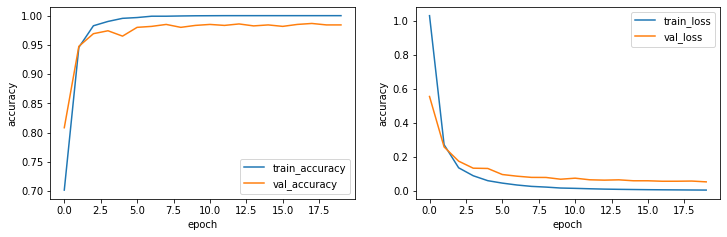

In [17]:
# Plotting Loss & Accuracy Graphs
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(12, 12))
plt.subplot(3, 2, 1)
plt.plot(history.history['acc'], label = 'train_accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(3, 2, 2)
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [18]:
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(15, 15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

True :  [0 0 0 ... 9 9 9]
Predicted :  [0 0 0 ... 9 9 9]


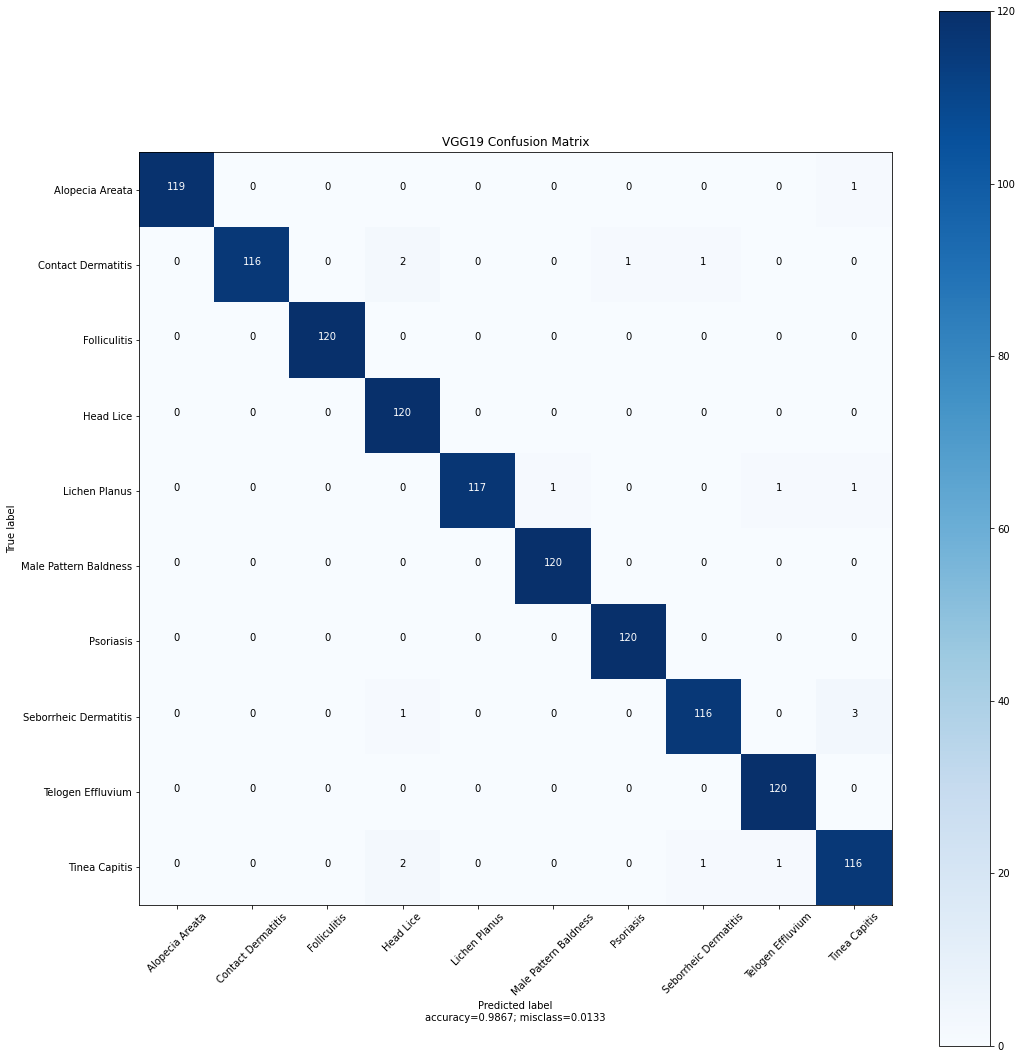

In [19]:
from sklearn.metrics import confusion_matrix

classes = ['Alopecia Areata', 'Contact Dermatitis', 'Folliculitis', 'Head Lice', 'Lichen Planus', 'Male Pattern Baldness', 'Psoriasis', 'Seborrheic Dermatitis', 'Telogen Effluvium', 'Tinea Capitis']

y_true = np.array(test_set.labels)
print("True : ", y_true)

y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
print("Predicted : ", y_pred)

conf_mat = confusion_matrix(y_true, y_pred)

plot_confusion_matrix(cm           = conf_mat,
                      normalize    = False,
                      target_names = classes,
                      title        = "VGG19 Confusion Matrix")